# Example: Extacting textual data from PDF files

By the end you'll be able to: 
- extract text from PDFs/URLs,
- clean it,
- explore with word clouds, 
- and build semantic networks.

## 0. Set-up (install & downloads)

In [2]:
# The following modules should already be installed if you are using Binder cloud environment.
# If you are running other environments, please uncomment the next lines and run only once:

#!pip install wordcloud

# Download small spaCy model
!python -m spacy download en_core_web_sm

## 1. Imports & Configuration

<div class="alert alert-block alert-warning">
    <B>Warning:</B>
    If you are running this example in the local Python envirnment, to avoid errors, make sure files <CODE>utspdf.py</CODE> and <CODE>utsnlp.py</CODE> are in your current directory.
</div>

In [32]:
# Load two custom designed modules

import utspdf as pdf
import utsnlp as uts
import numpy as np

## 2. Data Access

**Selecting the PDF source (local file or URL)**

You can point `pdf_file` to either a **local PDF** in this repository (recommended for portability) or to a **web URL**.

**Local file**
- Use a **relative path** from the notebook's working directory.
- Forward slashes `/` work on all platforms (Windows/macOS/Linux).
- If the filename contains spaces, keep it **inside quotes**.

*Examples*
```python
# Relative path (portable)
pdf_file = "data/Woolworths Group 2024 Sustainability Report.pdf"

# Absolute path (not portable; avoid in shared notebooks)
# On Windows, either escape backslashes or use a raw string:
pdf_file = r"C:\Users\YourName\project\data\Woolworths Group 2024 Sustainability Report.pdf"
```

**URL (direct link to a PDF on the web)**
- Use the full `https://…` URL.
- Spaces in URLs must be percent-encoded as `%20` (browsers often copy them that way).
- Ensure the link points directly to a .pdf file, not to an HTML page that embeds it.


Pick (uncomment by removing #) one of the following options:

In [2]:
pdf_file="data/Woolworths Group 2024 Sustainability Report.pdf"

#pdf_file="https://www.woolworthsgroup.com.au/content/dam/wwg/investors/reports/f24/f24/Woolworths%20Group%202024%20Sustainability%20Report.pdf"

#pdf_file="data/2024-ACEA.pdf"

## 3. Pre-processing

In [3]:
# Extracting text from PDF:
text_raw = pdf.extract_pdf_text(pdf_file) # Additional options: per_page=True, max_pages=5

In [4]:
# You can always get a qucik help on any function usage simply by:
help(pdf.extract_pdf_text)

Help on function extract_pdf_text in module utspdf:

extract_pdf_text(
    source: 'Union[str, bytes, io.BytesIO]',
    *,
    password: 'Optional[str]' = None,
    ocr: 'bool' = False,
    ocr_lang: 'str' = 'eng',
    per_page: 'bool' = False,
    max_pages: 'Optional[int]' = None
) -> 'Union[str, List[str]]'
    Extract text from a PDF given a local file path, a URL, or in-memory bytes.

    Parameters
    ----------
    source : str | bytes | io.BytesIO
        - Local path ('report.pdf'), URL ('https://.../paper.pdf'),
          raw PDF bytes, or a BytesIO object.
    password : str | None
        Password for encrypted PDFs (if needed).
    ocr : bool
        If True, run OCR on pages that appear image-only or empty.
        Requires: pytesseract, pdf2image, pillow, and Poppler/Tesseract on system.
    ocr_lang : str
        Tesseract language(s), e.g., 'eng', 'eng+fra'.
    per_page : bool
        If True, return a list of page strings; else a single concatenated string.
    max_

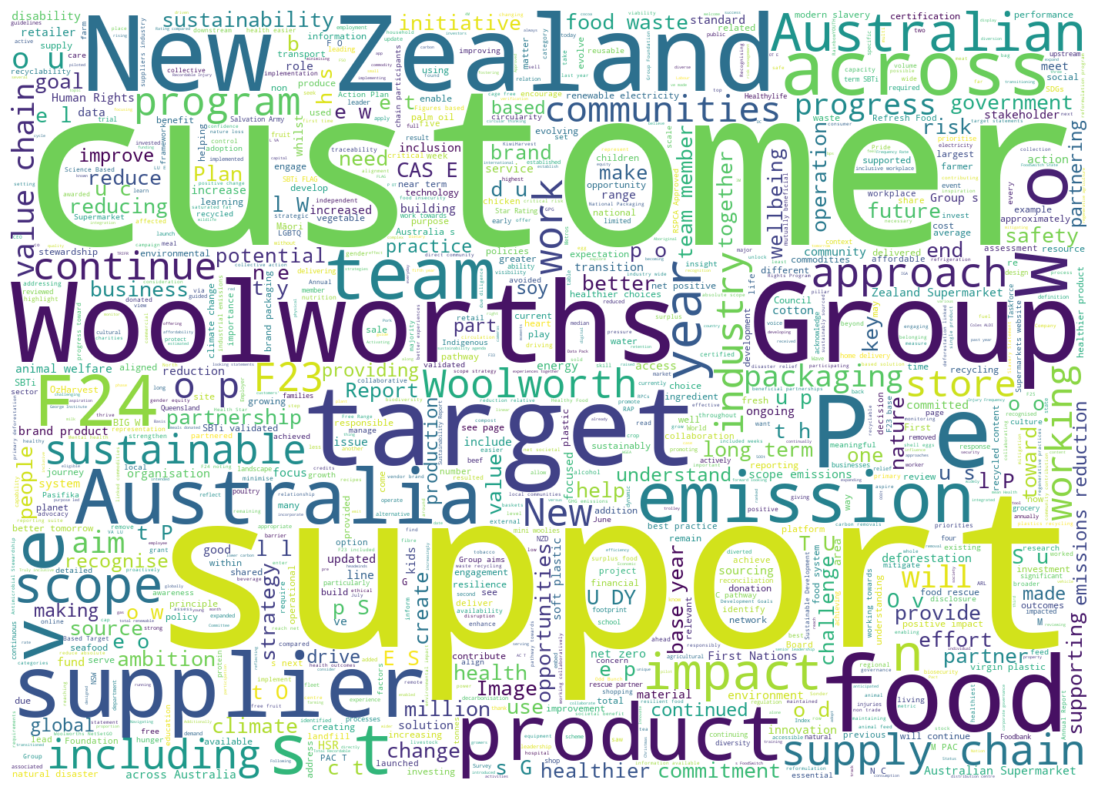

In [5]:
# Plotting a wordcloud for a quick summary of the textual data:
pdf.show_wordcloud(text_raw,max_words=1000, width=1400, height=1000)

In [ ]:
# Clean the extracted text 
text_clean = pdf.clean_pdf_text(text_raw)

In [23]:
# Cleaning diagnostics
def head_tail(s, n=400):
    return s[:n].replace("\n", "⏎") + (" … " if len(s) > n else "")

print("Before:", head_tail(text_raw))
print("\nAfter :", head_tail(text_clean))

print("\nLengths:", len(text_raw), "→", len(text_clean))

Before: 2024⏎Sustainability Report⏎Better together for 100 years⏎WOOLWORTHS GROUP LIMITED⏎ABN 88 000 014 675⏎⏎Better together is who we are⏎As we enter our centenary, we pause and reflect on the many moments ⏎that have shaped our journey, which at its heart is one of service.⏎From humble beginnings in 1924, Woolworths Group has proudly served Australian and ⏎New Zealand communities for 99 years through it … 

After : Sustainability Report Better together for 100 years WOOLWORTHS GROUP LIMITED ABN 88 000 014 675⏎⏎Better together is who we are As we enter our centenary, we pause and reflect on the many moments that have shaped our journey, which at its heart is one of service. From humble beginnings in 1924, Woolworths Group has proudly served Australian and New Zealand communities for 99 years through its every … 

Lengths: 186145 → 177603


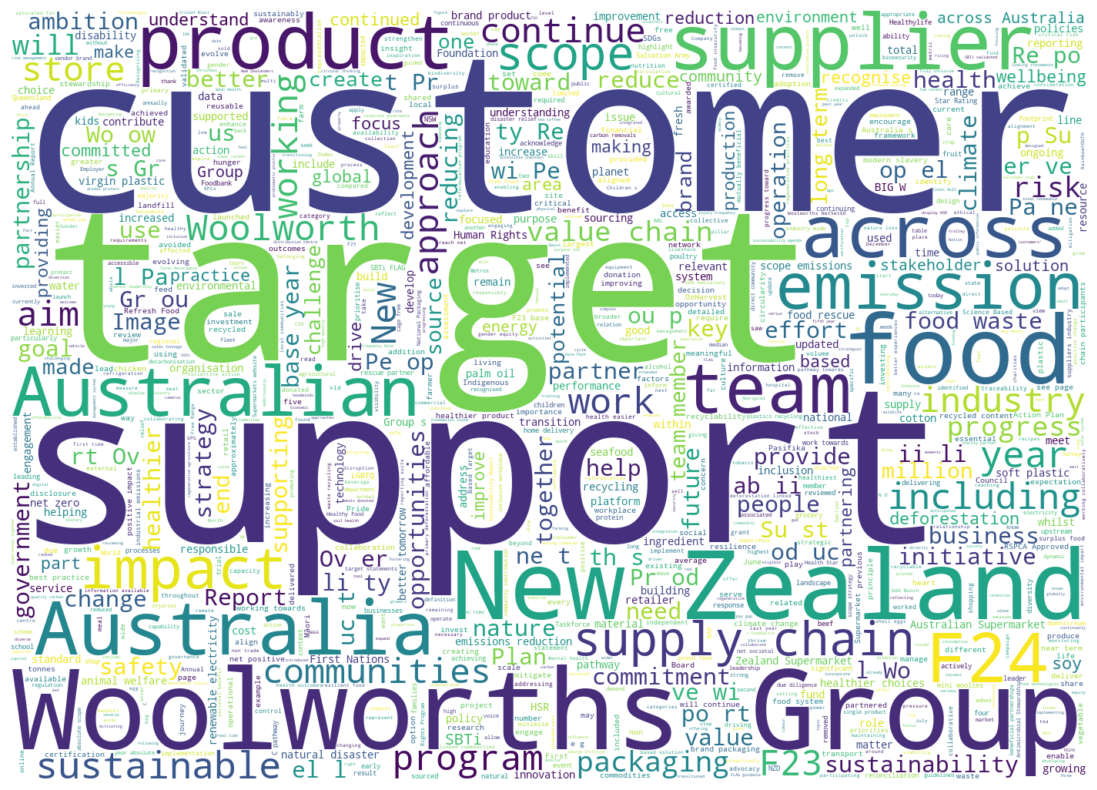

In [ ]:
# Re-plot the wordcloud with clean text:
pdf.show_wordcloud(text_clean,max_words=1000, width=1400, height=1000)

In [7]:
help(pdf.show_wordcloud)

Help on function show_wordcloud in module utspdf:

show_wordcloud(
    text: 'str',
    *,
    max_words: 'int' = 200,
    width: 'int' = 800,
    height: 'int' = 400,
    background_color: 'str' = 'white',
    colormap: 'str' = 'viridis',
    stopwords: 'Optional[set[str]]' = None,
    title: 'Optional[str]' = None,
    include_stopwords: 'bool' = False,
    use_nltk_stopwords: 'bool' = False
) -> 'None'
    Display a simple wordcloud from text.

    Parameters
    ----------
    text : str
        Input text (already extracted & cleaned).
    max_words : int
        Maximum words to display.
    width, height : int
        Dimensions of the figure.
    background_color : str
        Background colour ('white', 'black', etc.).
    colormap : str
        Matplotlib colormap for colouring words.
    stopwords : set[str] | None
        Optional *additional* stopwords to exclude (used only when include_stopwords=False).
    title : str | None
        Optional title for the plot.
    inclu

In [8]:
# Build a custom stopword set: start with WordCloud's defaults, add domain-specific terms

# first, save the existing list of stopwords
from wordcloud import STOPWORDS       

# now, merge the existing with your own list.
custom_stopwords = set(STOPWORDS) | {
    "F24", "F23", "year" 
}


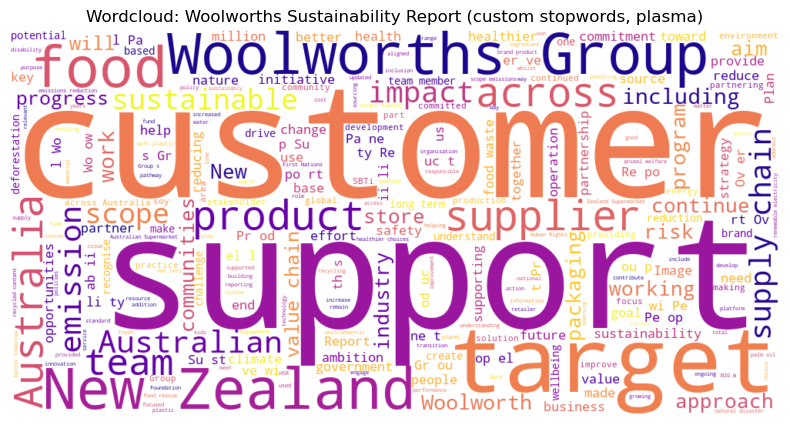

In [9]:
# Use *all* parameters explicitly
pdf.show_wordcloud(
    text=text_clean,           # str: your input text
    max_words=250,              # int: cap number of words shown
    width=1000,                 # int: figure width in pixels
    height=500,                 # int: figure height in pixels
    background_color="white",   # str: background colour
    colormap="plasma",          # str: any Matplotlib colormap (e.g., 'viridis', 'plasma', 'magma', 'cividis')
    stopwords=custom_stopwords, # Optional[set[str]]: exclude these tokens
    title="Wordcloud: Woolworths Sustainability Report (custom stopwords, plasma)"  # Optional[str]: plot title
)

### Are we done with cleaning the text???

Let's check the most frequent words. Note that wordcloud function by default exclude stopwords, but we can force it not to do it:

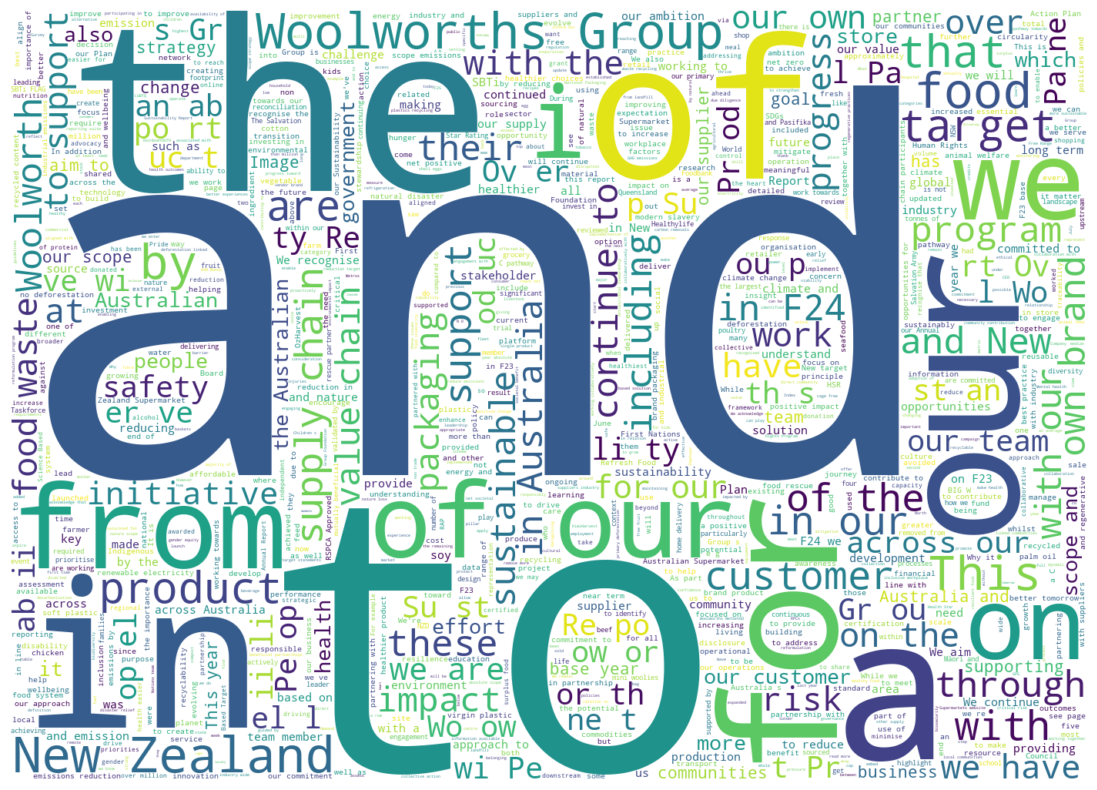

In [13]:
pdf.show_wordcloud(text=text_clean,max_words=1000, width=1400, height=1000, 
                    include_stopwords=True,   # set True to *include* stopwords in the cloud
                    )

Alternatively, we can always print/plot the list of top most frequent words as follows:

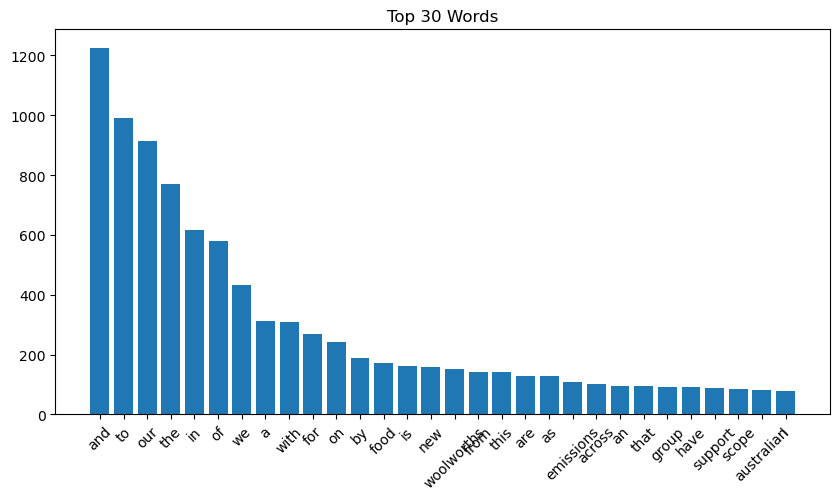

In [14]:
uts.plot_top_words(text_clean, n=30)

### Pre-processing text

Note: specific combination of pre-processign tasks will depend on the applications and goals:

In [15]:
text_processed=uts.preprocess_text(text_clean, 
                    remove_text_in_brackets=True,
                    remove_url=True,
                    remove_html_tags=True,
                    to_lower=True, 
                    expand_contractions=True,
                    remove_punctuation=True, 
                    remove_digits=True, 
                    remove_stopwords=True, 
                    remove_short_words_leq = 3,
                    lemmatize=True, 
                    stem=False, 
                    custom_stopwords=None,
                    custom_brackets=None)

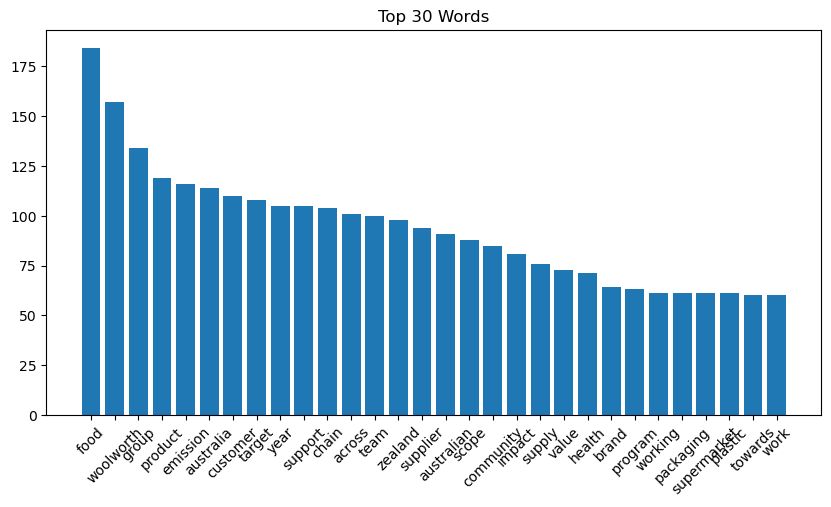

In [16]:
uts.plot_top_words(text_processed, n=30)

## 4. Analysing text and word dependencies

In [17]:
uts.plot_ngram_network_d3(
    text_processed,
    n=2,
    top_k_edges=100,
    min_count=2,
    stopwords={"the","and","of","to","in","for","with","on","our","we"},
    filepath="./bigrams_interactive.html",
    title="Bigram co-occurrence network",
    dark_mode=False
)

[19-08-2025 19:40:46] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[19-08-2025 19:40:46] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[19-08-2025 19:40:46] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[19-08-2025 19:40:46] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[19-08-2025 19:40:46] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[19-08-2025 19:40:46] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[19-08-2025 19:40:46] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[19-08-2025 19:40:46] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[19-08-2025 19:40:46] [colourmap.colourmap] [WARNING] Colormap [Set1] can not create [36] unique colors! Available unique colors: [9].
[19-08-2025 19:40:46] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[19-08-2025 19:40:46] [d3graph.d3graph] [INFO] Slider range is set to [5, 99]
[19-08-20

('./bigrams_interactive.html',
            source       target  weight
 0       woolworth        group      99
 1          supply        chain      61
 2            food        waste      43
 3           scope     emission      43
 4           value        chain      43
 ..            ...          ...     ...
 95       absolute        scope       6
 96         target    statement       6
 97           free        fruit       6
 98    supermarket      website       6
 99  antimicrobial  stewardship       6
 
 [100 rows x 3 columns])

In [18]:
# 1) Windowed semantic network with PPMI weighting (recommended quick start)
uts.plot_semantic_network_d3(
    text_processed,
    mode="window",
    window_size=5,
    weight="ppmi",
    top_k_edges=100,
    min_count=2,
    stopwords={"the","and","of","to","in","for","with","on","our","we"},
    filepath="./network_window_ppmi.html",
    title="Windowed semantic network (PPMI)"
)

[19-08-2025 19:41:25] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[19-08-2025 19:41:25] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[19-08-2025 19:41:25] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[19-08-2025 19:41:25] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[19-08-2025 19:41:26] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[19-08-2025 19:41:26] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[19-08-2025 19:41:26] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[19-08-2025 19:41:26] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[19-08-2025 19:41:26] [colourmap.colourmap] [WARNING] Colormap [Set1] can not create [66] unique colors! Available unique colors: [9].
[19-08-2025 19:41:26] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[19-08-2025 19:41:26] [d3graph.d3graph] [INFO] Slider range is set to [8, 12]
[19-08-20

('./network_window_ppmi.html',
         source                                             target     weight
 0     parental                                                pay  11.924998
 1     parental                                     superannuation  11.924998
 2      edelman  wwwwhointhealthtopicschildrenenvironmentalheal...  11.924998
 3    barometer                                            edelman  11.924998
 4     evacuate                                              wujal  11.924998
 ..         ...                                                ...        ...
 95  respondent                                             survey   9.977465
 96        mini                                        sommerville   9.977465
 97       solar                                          totalling   9.977465
 98    bifacial                                              solar   9.977465
 99       price                                             yellow   9.977465
 
 [100 rows x 3 columns])

In [37]:
# 2) Dependency network (requires spaCy model: python -m spacy download en_core_web_sm)
filepath, network_data_df = uts.plot_semantic_network_d3(
    text_processed,
    mode="dependency",
    weight="freq",                  # dependency links are already selective; freq often works well
    top_k_edges=100,
    min_count=2,
    keep_entities=True,
    filepath="./network_dependency.html",
    title="Dependency network"
)

[19-08-2025 20:05:28] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[19-08-2025 20:05:28] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[19-08-2025 20:05:28] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[19-08-2025 20:05:28] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[19-08-2025 20:05:28] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[19-08-2025 20:05:28] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[19-08-2025 20:05:28] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[19-08-2025 20:05:28] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[19-08-2025 20:05:29] [colourmap.colourmap] [WARNING] Colormap [Set1] can not create [24] unique colors! Available unique colors: [9].
[19-08-2025 20:05:29] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[19-08-2025 20:05:29] [d3graph.d3graph] [INFO] Slider range is set to [4, 86]
[19-08-20

In [20]:
# 3) Adjacent trigrams as phrases on the left, PPMI weighting
uts.plot_semantic_network_d3(
    text_processed,
    mode="adjacent",
    n=3,
    weight="ppmi",
    top_k_edges=100,
    filepath="./network_adjacent_trigrams.html",
    title="Adjacent trigram network (PPMI)"
)

[19-08-2025 19:41:51] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[19-08-2025 19:41:51] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[19-08-2025 19:41:51] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[19-08-2025 19:41:51] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[19-08-2025 19:41:51] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[19-08-2025 19:41:51] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[19-08-2025 19:41:51] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[19-08-2025 19:41:51] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[19-08-2025 19:41:51] [colourmap.colourmap] [WARNING] Colormap [Set1] can not create [97] unique colors! Available unique colors: [9].
[19-08-2025 19:41:51] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[19-08-2025 19:41:51] [d3graph.d3graph] [INFO] Slider range is set to [12, 15]
[19-08-2

('./network_adjacent_trigrams.html',
               source             target     weight
 0   aboriginal torre             strait  14.745044
 1       torre strait           islander  14.745044
 2       rainbow tick      accreditation  14.745044
 3        cost ential  echainopportunity  14.745044
 4     grower diverse              buyer  14.745044
 ..               ...                ...        ...
 95     retail career              today  13.160082
 96  lead responsible          retailing  13.160082
 97  access inclusion              index  13.160082
 98  district netball        association  13.160082
 99     remove carbon               emit  13.160082
 
 [100 rows x 3 columns])

<div class="alert alert-block alert-success">
    <B>Example:</B>
    Note that we have "saved" the results from one of the network function above in <CODE>network_data_df</CODE> dataframe. We can use these data to plot an alternative layout, called Chord Diagram.
</div> 

In [40]:
from d3blocks import D3Blocks
d3 = D3Blocks()
#d3.chord(edges_df, ordering='ascending')
d3.chord(edges_df, ordering='')

[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] Cleaning edge_properties and config parameters..
[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] Initializing [Chord]
[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] filepath is set to [C:\Users\Vitali\AppData\Local\Temp\d3blocks\chord.html]
[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] Convert to DataFrame.
[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] Node properties are set.
[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] Set edge-opacity based on the [source] node-opacity.
[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] Set edge-colors based on the [source] node-color.
[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] Edge properties are set.
[19-08-2025 20:09:43] [d3blocks.d3blocks] [INFO] File already exists and will be overwritten: [C:\Users\Vitali\AppData\Local\Temp\d3blocks\chord.html]
[19-08-2025 20:09:44] [d3blocks.d3bloc

<div class="alert alert-block alert-info">
    <B>Hint:</B>
    In the Chord Diagram function <CODE>d3.chord(edges_df, ordering='')</CODE>, try different ordering options, like <CODE>'ascending'</CODE> or <CODE>'descending'</CODE>. 
</div>